## The purpose of this work is to compare fmg with grist

- per Titus: https://mail.google.com/mail/u/0/#inbox/KtbxLzFzXsvqTmZxgnQtHTxKlZbWhGmDpg?compose=DmwnWrRpclcmkLJLppslxvvrNHbBQFTHsMgszFjGjVJPVxDggPzLTxwdzcLtrbXzsWzcgRFnRmtq

- /group/ctbrowngrp4/2025-zyzhao-assemloss/85/grist/outputs/leftover/{metagenome}.summary.csv, columns:

    - f_covered_bp (the fraction of bases covered by at least one read) == f_match (fmg) representing the containment of the genome in the metagenome).
    - effective_coverage (weighted) == median_abund (fmg)
    - n_mapped_reads ~== n_unique_weighted_found (fmg) with a scaling factor

- summary output comparison:
    - f_mapped_reads (mapped reads/total) == ref_f_weighted (fmg) 

    * n_mapped_reads (sum of n_mapped_reads --> see leftover/*.summary.csv)
    * The total number of reads (see outputs/{sample}.info.yaml.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("fmg_grist_table.csv")
df

,sample_id,n_match_genomes_fmg,avg_f_match,avg_median_abund,n_unique_weighted,n_match_genomes,avg_f_covered_bp,avg_effective_coverage,total_mapped_reads,total_n_reads,f_mapped_reads,ref_f_weighted,n_matches,biome
0,DRR014782,13557,0.019701,1.880910,658191,735,0.283430,5.906585,75612507,83531900,0.905193,0.949541,12389,Host-associated:Mammals:Respiratory system
1,DRR014785,14609,0.020887,1.879697,730806,892,0.272454,5.303160,83163638,91931356,0.904628,0.946977,13328,Host-associated:Mammals:Respiratory system
2,DRR121397,19375,0.006433,1.228387,85955,234,0.131079,1.655980,2121643,5715162,0.371231,0.648576,17436,Host-associated:Plants:Root
3,DRR121401,18383,0.005880,1.141843,65996,175,0.121921,1.409490,1311236,4546672,0.288395,0.601657,16482,Host-associated:Plants:Root
4,ERR10695318,14807,0.005826,6.803269,1732695,57,0.265579,126.762150,123175020,143348680,0.859269,0.877064,13000,Engineered:Food production:Dairy products
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,SRR7299214,28773,0.008495,1.931290,215684,351,0.276998,3.056625,6705137,16634768,0.403080,0.566850,26105,Engineered:Solid waste:Landfill
79,SRR7610133,15970,0.005793,1.618910,92171,13,0.817984,18.349528,3058996,5994846,0.510271,0.526295,14140,Host-associated:Fish:Digestive system
80,SRR9109404,23035,0.006760,1.937031,387873,90,0.415485,15.212256,25075735,38762198,0.646912,0.756233,20680,Host-associated:Fish:Digestive system
81,SRR9182859,60347,0.010038,3.139651,1424535,739,0.317031,17.608389,104629074,162463680,0.644015,0.644513,52569,Host-associated:Invertebrates:Cnidaria


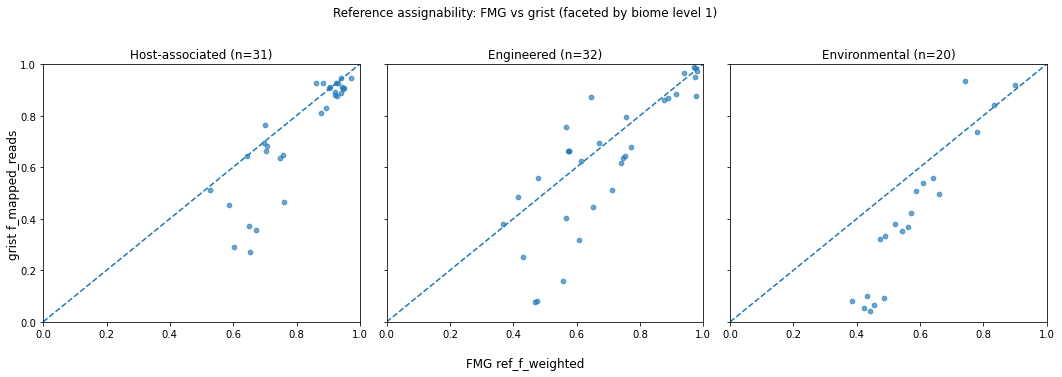

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ---- CONFIG ----
TABLE = "fmg_grist_table.csv"   # <-- change to your merged table file
OUTFILE = "A_ref_f_weighted_vs_f_mapped_reads_faceted_level1.png"
# ----------------

df = pd.read_csv(TABLE)

# Clean + enforce numeric
df = df.dropna(subset=["ref_f_weighted", "f_mapped_reads", "biome"]).copy()
df["ref_f_weighted"] = pd.to_numeric(df["ref_f_weighted"], errors="coerce")
df["f_mapped_reads"] = pd.to_numeric(df["f_mapped_reads"], errors="coerce")
df = df.dropna(subset=["ref_f_weighted", "f_mapped_reads"])

# Level-1 biome: first token before ':'
df["biome_l1"] = df["biome"].astype(str).str.split(":", n=1).str[0]

# Keep only requested level-1 categories (in desired order)
order = ["Host-associated", "Engineered", "Environmental"]
df = df[df["biome_l1"].isin(order)].copy()

# ---- Faceted plot (3 panels) ----
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)

for ax, b in zip(axes, order):
    sub = df[df["biome_l1"] == b]

    ax.scatter(
        sub["ref_f_weighted"],
        sub["f_mapped_reads"],
        s=22,
        alpha=0.65
    )

    # 45-degree line
    ax.plot([0, 1], [0, 1], linestyle="--")

    ax.set_title(f"{b} (n={len(sub)})")
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)

fig.supxlabel("FMG ref_f_weighted")
fig.supylabel("grist f_mapped_reads")
fig.suptitle("Reference assignability: FMG vs grist (faceted by biome level 1)", y=1.02)
fig.tight_layout()

plt.savefig(OUTFILE, dpi=300, bbox_inches="tight")
plt.show()


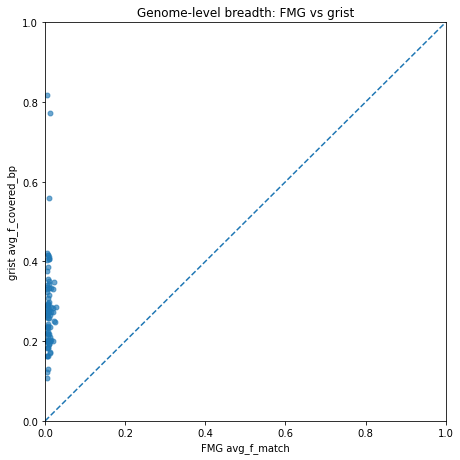

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ---- CONFIG ----
TABLE = "fmg_grist_table.csv"
OUTFILE = "B_avg_f_match_vs_avg_f_covered_bp.png"
# ----------------

df = pd.read_csv(TABLE)

# Clean + enforce numeric
df = df.dropna(subset=["avg_f_match", "avg_f_covered_bp"]).copy()
df["avg_f_match"] = pd.to_numeric(df["avg_f_match"], errors="coerce")
df["avg_f_covered_bp"] = pd.to_numeric(df["avg_f_covered_bp"], errors="coerce")
df = df.dropna(subset=["avg_f_match", "avg_f_covered_bp"])

# ---- Scatter plot ----
plt.figure(figsize=(6.5, 6.5))

plt.scatter(
    df["avg_f_match"],
    df["avg_f_covered_bp"],
    s=24,
    alpha=0.65
)

# 45-degree line
plt.plot([0, 1], [0, 1], linestyle="--")

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("FMG avg_f_match")
plt.ylabel("grist avg_f_covered_bp")
plt.title("Genome-level breadth: FMG vs grist")

plt.tight_layout()
plt.savefig(OUTFILE, dpi=300)
plt.show()

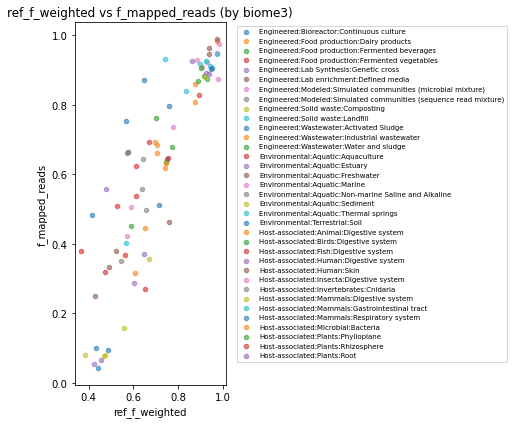

In [16]:
plt.figure(figsize=(7, 6))

for biome, sub in joined.groupby("biome3"):
    plt.scatter(
        sub["ref_f_weighted"],
        sub["f_mapped_reads"],
        alpha=0.6,
        s=20,
        label=biome
    )

plt.xlabel("ref_f_weighted")
plt.ylabel("f_mapped_reads")
plt.title("ref_f_weighted vs f_mapped_reads (by biome3)")

plt.legend(
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    fontsize=7
)

plt.tight_layout()
plt.savefig("ref_f_weighted_vs_f_mapped_reads_biome3.png", dpi=300)
plt.show()


In [19]:
import matplotlib.pyplot as plt

joined["biome1"] = joined["biome3"].str.split(":").str[0]

# Get unique biome1 values (stable order)
biomes = sorted(joined["biome1"].unique())

# Assign colors using matplotlib default cycle
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
biome_color = {
    biome: colors[i % len(colors)]
    for i, biome in enumerate(biomes)
}

Text(0.5, 1.0, 'ref_f_weighted vs f_mapped_reads (colored by biome1)')

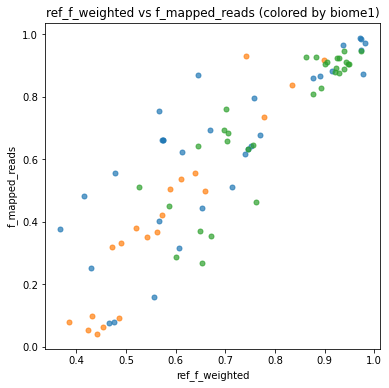

In [20]:
plt.figure(figsize=(6, 6))

for biome1, sub in joined.groupby("biome1"):
    plt.scatter(
        sub["ref_f_weighted"],
        sub["f_mapped_reads"],
        s=25,
        alpha=0.7,
        color=biome_color[biome1],
        label=biome1,
        zorder=3
    )

plt.xlabel("ref_f_weighted")
plt.ylabel("f_mapped_reads")
plt.title("ref_f_weighted vs f_mapped_reads (colored by biome1)")


In [21]:
# add three biome-specific legend and shadow trends
# Ensure biome1 ordering & colors (explicit, stable)
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# Explicit order
biome_order = ["Host-associated", "Engineered", "Environmental"]

# Explicit colors (use matplotlib defaults or tweak)
biome_color = {
    "Host-associated": "#1f77b4",
    "Engineered": "#ff7f0e",
    "Environmental": "#2ca02c",
}

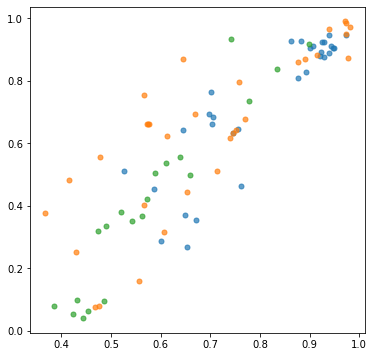

In [22]:
# Scatter plot (unchanged logic, ordered)
plt.figure(figsize=(6, 6))

for biome1 in biome_order:
    sub = joined[joined["biome1"] == biome1]
    plt.scatter(
        sub["ref_f_weighted"],
        sub["f_mapped_reads"],
        s=25,
        alpha=0.7,
        color=biome_color[biome1],
        label=biome1,
        zorder=3
    )

Text(0.5, 1.0, 'ref_f_weighted vs f_mapped_reads (colored by biome1)')

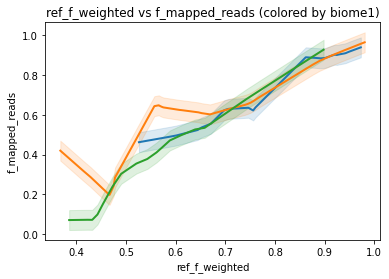

In [23]:
# Explicit order
biome_order = ["Host-associated", "Engineered", "Environmental"]

# Explicit colors (use matplotlib defaults or tweak)
biome_color = {
    "Host-associated": "#1f77b4",
    "Engineered": "#ff7f0e",
    "Environmental": "#2ca02c",
}

# Shadow + trend per biome1, each biome gets its own LOWESS shadow, colored to match
for biome1 in biome_order:
    sub = joined[joined["biome1"] == biome1]

    x = sub["ref_f_weighted"].values
    y = sub["f_mapped_reads"].values

    if len(x) < 5:
        continue  # skip tiny groups safely

    smoothed = lowess(y, x, frac=0.4, return_sorted=True)
    xs, ys = smoothed[:, 0], smoothed[:, 1]

    # Shadow band
    plt.fill_between(
        xs,
        ys - 0.05,
        ys + 0.05,
        color=biome_color[biome1],
        alpha=0.15,
        zorder=1
    )

    # Trend line
    plt.plot(
        xs,
        ys,
        color=biome_color[biome1],
        linewidth=2,
        zorder=2
    )
plt.xlabel("ref_f_weighted")
plt.ylabel("f_mapped_reads")
plt.title("ref_f_weighted vs f_mapped_reads (colored by biome1)")

"Host-associated": "#1f77b4", blue
"Engineered": "#ff7f0e", orange
"Environmental": "#2ca02c", green